# Supervised Learning Homework
### imports, create DataFrames of bottle and cast csv files

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from numpy import random

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.impute import SimpleImputer

pd.options.display.max_columns = None
pd.options.display.max_rows = None

#import bottle and cast dataset

bottle_df = pd.read_csv('bottle.csv')
cast_df = pd.read_csv('cast.csv')


/Users/yewandetaiwo/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (47,73) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/Users/yewandetaiwo/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (40,41,44,45,46,47) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


## Preprocessing
### Preprocessing for the bottle dataframe: dropped all the null columns that had a threshold of 650000 non-NA values. The shape went from (864863,74) to (864863, 30). Did this by taking a sum of the null values for each column and used the number of null values to set a high threshold. Also, mathematically, the threshold cutoff was around 75%. Dropped rows with null values. 

In [2]:
bottle_df.isnull().sum()

Cst_Cnt                     0
Btl_Cnt                     0
Sta_ID                      0
Depth_ID                    0
Depthm                      0
T_degC                  10963
Salnty                  47354
O2ml_L                 168662
STheta                  52689
O2Sat                  203589
Oxy_µmol/Kg            203595
BtlNum                 746196
RecInd                      0
T_prec                  10963
T_qual                 841736
S_prec                  47354
S_qual                 789949
P_qual                 191108
O_qual                 680187
SThtaq                 799040
O2Satq                 647066
ChlorA                 639591
Chlqua                 225697
Phaeop                 639592
Phaqua                 225693
PO4uM                  451546
PO4q                   413077
SiO3uM                 510772
SiO3qu                 353997
NO2uM                  527287
NO2q                   335389
NO3uM                  527460
NO3q                   334930
NH3uM     

In [3]:
bottle_df = bottle_df.dropna(axis = 1, thresh=650000)
bottle_df = bottle_df.dropna(axis=0)
bottle_df.shape

(454322, 30)

### Preprocessing for the cast dataframe included dropping columns with null values with a threshold of 25,800 - which is about 75%. Did some feature engineering on the time dataset - by taking out the hour and minute information. Dropped the date and time column since the relevant info (day,year,hour,minute) was already extracted so it's no longer needed. 

In [4]:
cast_df.head()

,Cst_Cnt,Cruise_ID,Cruise,Cruz_Sta,DbSta_ID,Cast_ID,Sta_ID,Quarter,Sta_Code,Distance,Date,Year,Month,Julian_Date,Julian_Day,Time,Lat_Dec,Lat_Deg,Lat_Min,Lat_Hem,Lon_Dec,Lon_Deg,Lon_Min,Lon_Hem,Rpt_Line,St_Line,Ac_Line,Rpt_Sta,St_Station,Ac_Sta,Bottom_D,Secchi,ForelU,Ship_Name,Ship_Code,Data_Type,Order_Occ,Event_Num,Cruz_Leg,Orig_Sta_ID,Data_Or,Cruz_Num,IntChl,IntC14,Inc_Str,Inc_End,PST_LAN,Civil_T,TimeZone,Wave_Dir,Wave_Ht,Wave_Prd,Wind_Dir,Wind_Spd,Barometer,Dry_T,Wet_T,Wea,Cloud_Typ,Cloud_Amt,Visibility
0,1,1949-03-01-C-31CR,194903,19490305400560,5400560,19-4903CR-HY-060-0930-05400560,054.0 056.0,1,NST,NaN,03/01/1949,1949,3,17958,60,09:30:00,38.833333,38,50.0,N,-124.083333,-124,5.0,W,54.0,54.0,53.8,56.0,56.0,55.8,NaN,NaN,NaN,CREST,31CR,HY,NaN,1.0,NaN,054 56,NaN,4903,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0,18.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN
1,2,1949-03-01-C-31CR,194903,19490305200750,5200750,19-4903CR-HY-060-2112-05200750,052.0 075.0,1,NST,NaN,03/01/1949,1949,3,17958,60,21:12:00,38.583333,38,35.0,N,-125.800000,-125,48.0,W,52.0,52.0,51.5,75.0,75.0,75.1,NaN,NaN,NaN,CREST,31CR,HY,NaN,2.0,NaN,052 75,NaN,4903,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0,5.0,NaN,NaN,NaN,4.0,NaN,NaN,NaN
2,3,1949-03-01-C-31CR,194903,19490305100850,5100850,19-4903CR-HY-061-0354-05100850,051.0 085.0,1,NST,NaN,03/02/1949,1949,3,17959,61,03:54:00,38.475000,38,28.5,N,-126.666666,-126,40.0,W,51.0,51.0,50.3,85.0,85.0,84.7,NaN,NaN,NaN,CREST,31CR,HY,NaN,3.0,NaN,051 85,NaN,4903,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0,5.0,NaN,NaN,NaN,6.0,NaN,NaN,NaN
3,4,1949-03-01-C-31CR,194903,19490305000950,5000950,19-4903CR-HY-061-1042-05000950,050.0 095.0,1,NST,NaN,03/02/1949,1949,3,17959,61,10:42:00,38.333333,38,20.0,N,-127.516666,-127,31.0,W,50.0,50.0,49.2,95.0,95.0,94.3,NaN,NaN,NaN,CREST,31CR,HY,NaN,4.0,NaN,050 95,NaN,4903,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.0,8.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN
4,5,1949-03-01-C-31CR,194903,19490305001040,5001040,19-4903CR-HY-061-1706-05001040,050.0 104.0,1,NST,NaN,03/02/1949,1949,3,17959,61,17:06:00,38.233333,38,14.0,N,-128.366666,-128,22.0,W,50.0,50.0,48.0,104.0,104.0,103.7,NaN,NaN,NaN,CREST,31CR,HY,NaN,5.0,NaN,050 104,NaN,4903,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.0,13.0,NaN,NaN,NaN,7.0,NaN,NaN,NaN


In [5]:
cast_df.shape

(34404, 61)

In [6]:
cast_df.isnull().sum()

Cst_Cnt            0
Cruise_ID          0
Cruise             0
Cruz_Sta           0
DbSta_ID           0
Cast_ID            0
Sta_ID             0
Quarter            0
Sta_Code           0
Distance       14690
Date               0
Year               0
Month              0
Julian_Date        0
Julian_Day         0
Time             324
Lat_Dec            0
Lat_Deg            0
Lat_Min            0
Lat_Hem            0
Lon_Dec            0
Lon_Deg            0
Lon_Min            0
Lon_Hem            0
Rpt_Line           0
St_Line            0
Ac_Line            0
Rpt_Sta            0
St_Station         0
Ac_Sta             0
Bottom_D        2281
Secchi         29141
ForelU         32327
Ship_Name       1690
Ship_Code          0
Data_Type          0
Order_Occ      24450
Event_Num          3
Cruz_Leg       32940
Orig_Sta_ID        0
Data_Or        16129
Cruz_Num           0
IntChl         22201
IntC14         32275
Inc_Str        32271
Inc_End        32271
PST_LAN        32287
Civil_T      

In [7]:
cast_df = cast_df.dropna(axis = 1, thresh=25800)
cast_df.head()

,Cst_Cnt,Cruise_ID,Cruise,Cruz_Sta,DbSta_ID,Cast_ID,Sta_ID,Quarter,Sta_Code,Date,Year,Month,Julian_Date,Julian_Day,Time,Lat_Dec,Lat_Deg,Lat_Min,Lat_Hem,Lon_Dec,Lon_Deg,Lon_Min,Lon_Hem,Rpt_Line,St_Line,Ac_Line,Rpt_Sta,St_Station,Ac_Sta,Bottom_D,Ship_Name,Ship_Code,Data_Type,Event_Num,Orig_Sta_ID,Cruz_Num,Wind_Dir,Wind_Spd,Wea
0,1,1949-03-01-C-31CR,194903,19490305400560,5400560,19-4903CR-HY-060-0930-05400560,054.0 056.0,1,NST,03/01/1949,1949,3,17958,60,09:30:00,38.833333,38,50.0,N,-124.083333,-124,5.0,W,54.0,54.0,53.8,56.0,56.0,55.8,NaN,CREST,31CR,HY,1.0,054 56,4903,23.0,18.0,2.0
1,2,1949-03-01-C-31CR,194903,19490305200750,5200750,19-4903CR-HY-060-2112-05200750,052.0 075.0,1,NST,03/01/1949,1949,3,17958,60,21:12:00,38.583333,38,35.0,N,-125.800000,-125,48.0,W,52.0,52.0,51.5,75.0,75.0,75.1,NaN,CREST,31CR,HY,2.0,052 75,4903,16.0,5.0,4.0
2,3,1949-03-01-C-31CR,194903,19490305100850,5100850,19-4903CR-HY-061-0354-05100850,051.0 085.0,1,NST,03/02/1949,1949,3,17959,61,03:54:00,38.475000,38,28.5,N,-126.666666,-126,40.0,W,51.0,51.0,50.3,85.0,85.0,84.7,NaN,CREST,31CR,HY,3.0,051 85,4903,23.0,5.0,6.0
3,4,1949-03-01-C-31CR,194903,19490305000950,5000950,19-4903CR-HY-061-1042-05000950,050.0 095.0,1,NST,03/02/1949,1949,3,17959,61,10:42:00,38.333333,38,20.0,N,-127.516666,-127,31.0,W,50.0,50.0,49.2,95.0,95.0,94.3,NaN,CREST,31CR,HY,4.0,050 95,4903,18.0,8.0,2.0
4,5,1949-03-01-C-31CR,194903,19490305001040,5001040,19-4903CR-HY-061-1706-05001040,050.0 104.0,1,NST,03/02/1949,1949,3,17959,61,17:06:00,38.233333,38,14.0,N,-128.366666,-128,22.0,W,50.0,50.0,48.0,104.0,104.0,103.7,NaN,CREST,31CR,HY,5.0,050 104,4903,27.0,13.0,7.0


In [8]:
cast_df["Time"] = cast_df["Time"].astype("datetime64[ns]")
cast_df['Hour'] =  cast_df['Time'].apply(lambda x: x.hour)
cast_df['Minutes'] = cast_df["Time"].apply(lambda x: x.minute)

cast_df.drop(['Date', 'Time'],axis=1).head()

,Cst_Cnt,Cruise_ID,Cruise,Cruz_Sta,DbSta_ID,Cast_ID,Sta_ID,Quarter,Sta_Code,Year,Month,Julian_Date,Julian_Day,Lat_Dec,Lat_Deg,Lat_Min,Lat_Hem,Lon_Dec,Lon_Deg,Lon_Min,Lon_Hem,Rpt_Line,St_Line,Ac_Line,Rpt_Sta,St_Station,Ac_Sta,Bottom_D,Ship_Name,Ship_Code,Data_Type,Event_Num,Orig_Sta_ID,Cruz_Num,Wind_Dir,Wind_Spd,Wea,Hour,Minutes
0,1,1949-03-01-C-31CR,194903,19490305400560,5400560,19-4903CR-HY-060-0930-05400560,054.0 056.0,1,NST,1949,3,17958,60,38.833333,38,50.0,N,-124.083333,-124,5.0,W,54.0,54.0,53.8,56.0,56.0,55.8,NaN,CREST,31CR,HY,1.0,054 56,4903,23.0,18.0,2.0,9.0,30.0
1,2,1949-03-01-C-31CR,194903,19490305200750,5200750,19-4903CR-HY-060-2112-05200750,052.0 075.0,1,NST,1949,3,17958,60,38.583333,38,35.0,N,-125.800000,-125,48.0,W,52.0,52.0,51.5,75.0,75.0,75.1,NaN,CREST,31CR,HY,2.0,052 75,4903,16.0,5.0,4.0,21.0,12.0
2,3,1949-03-01-C-31CR,194903,19490305100850,5100850,19-4903CR-HY-061-0354-05100850,051.0 085.0,1,NST,1949,3,17959,61,38.475000,38,28.5,N,-126.666666,-126,40.0,W,51.0,51.0,50.3,85.0,85.0,84.7,NaN,CREST,31CR,HY,3.0,051 85,4903,23.0,5.0,6.0,3.0,54.0
3,4,1949-03-01-C-31CR,194903,19490305000950,5000950,19-4903CR-HY-061-1042-05000950,050.0 095.0,1,NST,1949,3,17959,61,38.333333,38,20.0,N,-127.516666,-127,31.0,W,50.0,50.0,49.2,95.0,95.0,94.3,NaN,CREST,31CR,HY,4.0,050 95,4903,18.0,8.0,2.0,10.0,42.0
4,5,1949-03-01-C-31CR,194903,19490305001040,5001040,19-4903CR-HY-061-1706-05001040,050.0 104.0,1,NST,1949,3,17959,61,38.233333,38,14.0,N,-128.366666,-128,22.0,W,50.0,50.0,48.0,104.0,104.0,103.7,NaN,CREST,31CR,HY,5.0,050 104,4903,27.0,13.0,7.0,17.0,6.0


2.	Create a correlation matrix to see how the features are correlated. Describe your findings. Pay particular attention to what is correlated with water temperature.

#### Water temperature is more correlated with Depthm and O2ml_L - it's not that correlated with Salnty much. Water temperature is also correlated with O2Sat, and STheta. 

In [9]:
bottle_corr_matrix = bottle_df.corr()
print(bottle_corr_matrix)

              Cst_Cnt   Btl_Cnt    Depthm    T_degC    Salnty    O2ml_L  \
Cst_Cnt      1.000000  0.999013 -0.112160  0.044125 -0.102703  0.087896   
Btl_Cnt      0.999013  1.000000 -0.111744  0.046246 -0.098117  0.087013   
Depthm      -0.112160 -0.111744  1.000000 -0.664077  0.531236 -0.569333   
T_degC       0.044125  0.046246 -0.664077  1.000000 -0.415204  0.768986   
Salnty      -0.102703 -0.098117  0.531236 -0.415204  1.000000 -0.791003   
O2ml_L       0.087896  0.087013 -0.569333  0.768986 -0.791003  1.000000   
STheta      -0.055676 -0.055710  0.664779 -0.959492  0.636529 -0.878445   
O2Sat        0.078368  0.077808 -0.578697  0.829915 -0.747729  0.992603   
Oxy_µmol/Kg  0.087794  0.086911 -0.569433  0.769543 -0.790886  0.999999   
RecInd       0.188651  0.183943  0.052434 -0.083557  0.005870 -0.054066   
T_prec       0.000891 -0.000171  0.036425 -0.025528 -0.001298 -0.001857   
S_prec       0.445918  0.447956  0.046677 -0.087043 -0.006651 -0.024022   
P_qual      -0.003285 -0.

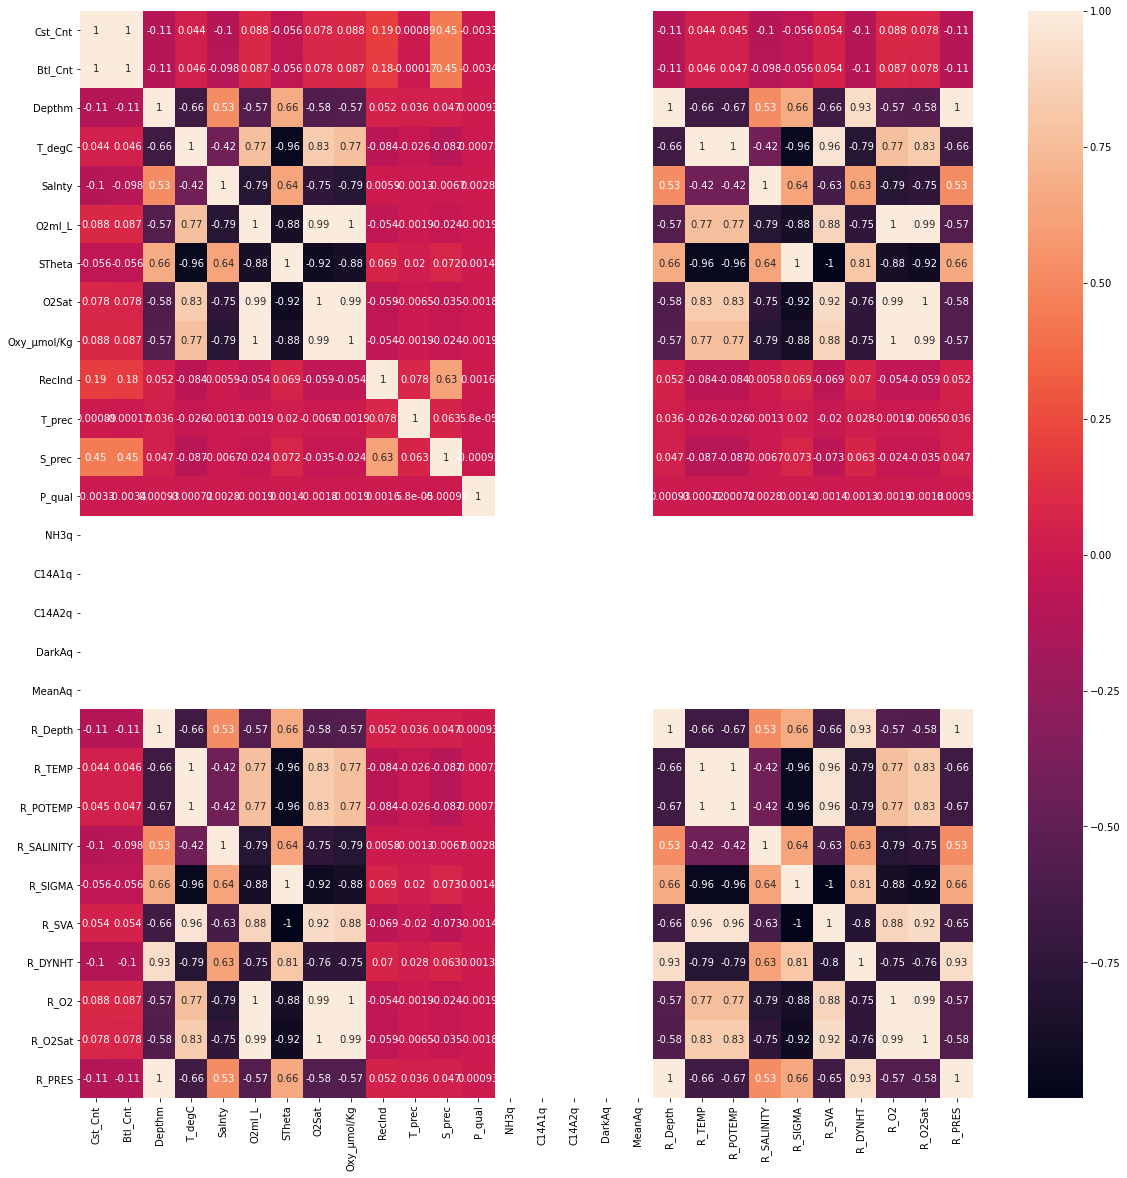

In [10]:
fig,ax=plt.subplots(figsize=(20,20))
sns.heatmap(bottle_corr_matrix, annot = True)
plt.show()

3.	Perform linear regression on the dataset to see if you can predict water temperature based on salinity. 

In [11]:
X = np.array(bottle_df['Salnty']).reshape(-1,1)
y = np.array(bottle_df['T_degC']).reshape(-1,1)

lin_reg = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=0)

lin_reg.fit(X_train,y_train)
y_pred=lin_reg.predict(X_test)

In [12]:
accuracy_score = lin_reg.score(X_test, y_test)
print(accuracy_score)

0.1770128086246059


4.	Find your mean squared error and R2 values. Be sure to indicate what these tell you. You can import these from sklearn.metrics

#### The mean squared error is finding the average set of errors. The lower the value, the better the fit of the line is. For the linear regression, there's a mean squared error of 15.9, which means that the regression line is not the best fit. The R2 score tells how good the fit of a line is - the closer the value is the one the better the fit is. The r2 score also tells us that the fit of the line isn't that good. This makes sense because from the earlier correlation matrix, we see that the Salinity and water temperature isn't that highly correlated with each other. So the regression line isn't going to fit the data that well. 

In [13]:
from sklearn.metrics import mean_squared_error
print('Mean Squared Error:', mean_squared_error(y_test,y_pred))
print('r2 score:', r2_score(y_test,y_pred))

Mean Squared Error: 15.855585972362668
r2 score: 0.1770128086246059


5.	Create a final plot of the relationship between water temperature and salinity. Be sure to show the values from the dataset in a scatter plot with a trend line that shows the predicted temperature values. 

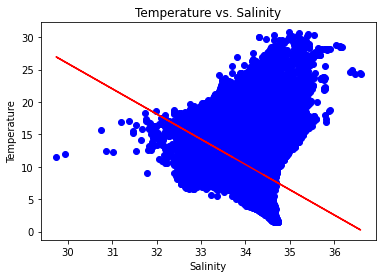

In [14]:
plt.scatter(X_test, y_test, color = 'b')
plt.plot(X_test, y_pred, color='r')
plt.title('Temperature vs. Salinity')
plt.xlabel('Salinity')
plt.ylabel("Temperature")
plt.show()

6.	Do some research on polynomial regression. Describe what it is any how it works in markdown. This article is useful https://machinelearningmastery.com/polynomial-features-transforms-for-machine-learning/ 

#### Polynomial regression is used when a relationship between two variables isn't necessarily linear. In polynomial regression, the relationship between x and y is modeled to an nth degree. This gives the best approximation of the relationship between two variables.

7.	Perform polynomial regression on this same dataset. Train and validate your model as you did when you used linear regression. Mean squared error and R2 both apply here.

In [15]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

poly=PolynomialFeatures(degree = 2)

X_poly = poly.fit_transform(X)

pr_model = LinearRegression()

pr_model.fit(X_poly,y)

y_poly_pred = pr_model.predict(X_poly)

#print ('Coefficients: ', clf.coef_)
#print ('Intercept: ',clf.intercept_)

In [16]:
print('Mean Squared Error', mean_squared_error(y,y_poly_pred))
print('r2 score', r2_score(y,y_poly_pred))

Mean Squared Error 15.378581519127266
r2 score 0.20365882936172275


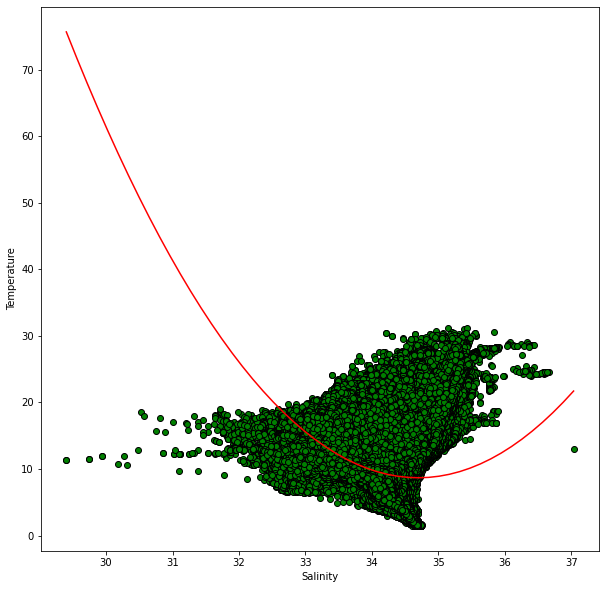

In [21]:
prediction_space = np.linspace(min(X), max(X))
plt.figure(figsize=(10,10))
plt.scatter(X,y,color='g',edgecolors="black")
#plt.plot(X,y_poly_pred, color = 'r')
plt.plot(prediction_space,pr_model.predict(poly.fit_transform(prediction_space)), color = "r")
plt.xlabel("Salinity")
plt.ylabel("Temperature")
plt.show()